In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Continued-Fractions/notebooks')

In [2]:
import sys
# Append parent dir to path, so that other modules can be imported.
sys.path.append('../')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from mpmath import mp
from tqdm.auto import tqdm

In [4]:
mp.dps = 501
plt.style.use('dark_background')

## Brjuno function
https://en.wikipedia.org/wiki/Brjuno_number

**Brjuno sum** \
The Brjuno sum or Brjuno function $B$ is \
$B(\alpha) = \sum_{n=0}^{\infty} \frac{\log q_{n+1}}{q_n}$ \
where:
 - $q_n$ is the denominator of the nth convergent $\frac{p_n}{q_n}$ of the continued fraction expansion of $\alpha$.

\
**Yoccoz's variant** \
Yoccoz's variant of the Brjuno sum defined as follows: \
$Y(\alpha) = \sum_{n=0}^{\infty} a_0 \cdots a_{n-1} \log\frac{1}{a_n}$ , \
where:
- $\alpha$ is irrational real number: $\alpha \in \mathbb{R} \backslash \mathbb{Q}$
- $\alpha_0$ is the fractional part of $\alpha$
- $\alpha_{n+1}$ is the fractional part of $\frac{1}{\alpha_n}$

\
This sum converges if and only if the Brjuno sum does, and in fact **their difference is bounded by a universal constant**.

In [5]:
from CF_core import compute_cf, compute_convergents_from_cf, compute_successive_frac_invs
from modules.CF_utils import Brjuno_func, Yoccoz_func

In [6]:
nums = np.sort(np.random.rand(10001))
n = 20

brjuno_sums = []
for num in tqdm(nums):
  # 0th convergent is also included.
  convergents = compute_convergents_from_cf(
      compute_cf(num, n), all_convergents=True)
  brjuno_sums.append(Brjuno_func(convergents))
brjuno_sums = np.array(brjuno_sums)

yoccoz_sums = []
for num in tqdm(nums):
  coeffs = compute_successive_frac_invs(num, n)
  yoccoz_sums.append(Yoccoz_func(coeffs))
yoccoz_sums = np.array(yoccoz_sums)

  0%|          | 0/10001 [00:00<?, ?it/s]

  0%|          | 0/10001 [00:00<?, ?it/s]

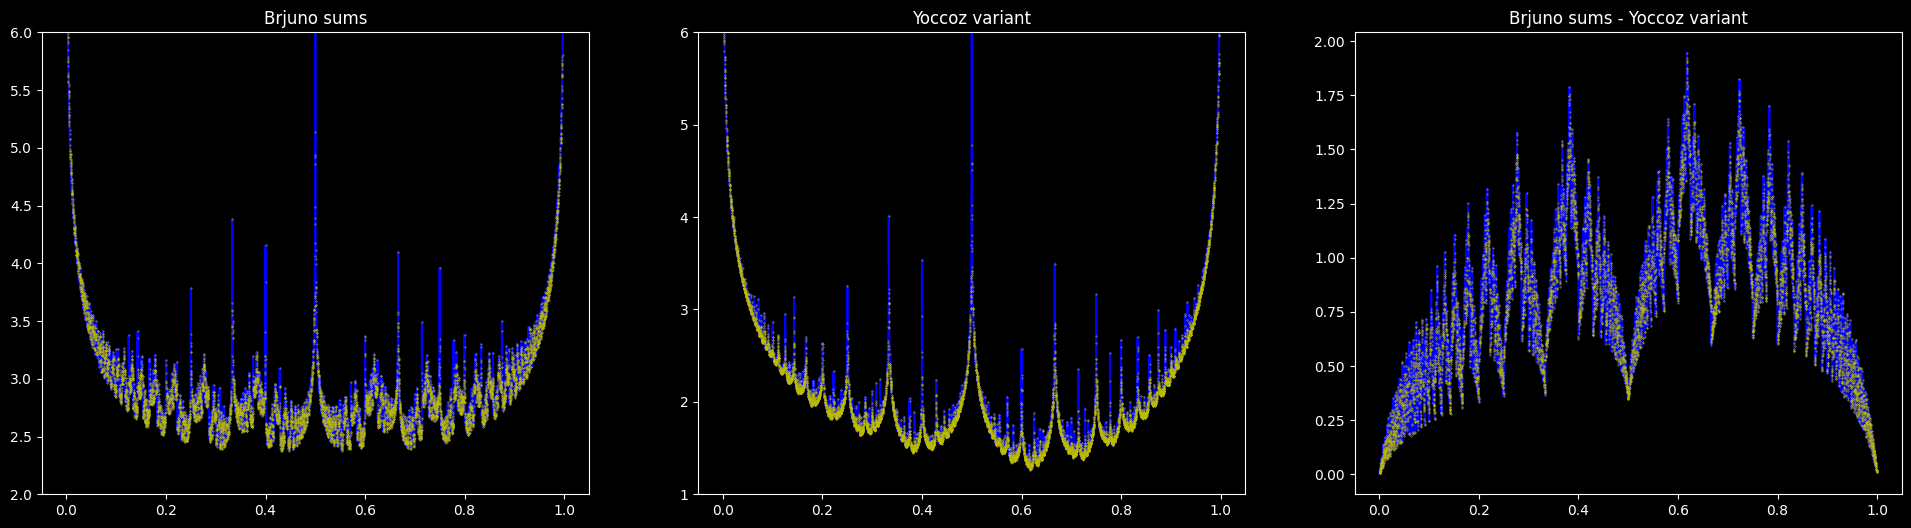

In [7]:
fig, axs = plt.subplots(1,3, figsize=(24,6))
plt.sca(axs[0])
plt.plot(nums, brjuno_sums, c='b')
plt.scatter(nums, brjuno_sums, s=0.1, c='y', zorder=2)
plt.ylim(2,6)
plt.title('Brjuno sums')

plt.sca(axs[1])
plt.plot(nums, yoccoz_sums, c='b')
plt.scatter(nums, yoccoz_sums, s=0.1, c='y', zorder=2)
plt.ylim(1,6)
plt.title('Yoccoz variant')

plt.sca(axs[2])
plt.plot(nums, brjuno_sums - yoccoz_sums, c='b')
plt.scatter(nums, brjuno_sums - yoccoz_sums, s=0.1, c='y', zorder=2)
plt.title('Brjuno sums - Yoccoz variant')
plt.show()

Looking at the plots it seems that it experiences a local minima at $0.5$ a maxima at the **reciprocal golden ratio** $\frac{1}{\varphi}$.

In [8]:
slc = slice(3000, 7000)
print(nums[slc][(brjuno_sums[slc]-yoccoz_sums[slc]).argmin()], end=' -> ')
print(float((brjuno_sums[slc]-yoccoz_sums[slc]).min()))

print(nums[(brjuno_sums-yoccoz_sums).argmax()], end=' -> ')
print(float((brjuno_sums-yoccoz_sums).max()))

0.49999846869274855 -> 0.34669294780395743
0.6179126592195566 -> 1.9442518332272667


$B(\frac{1}{2}) - Y(\frac{1}{2}) = \frac{\log 2}{2}$ \
$=0.3465735902799727...$

### Reciprocal Golden Ratio

**Brjuno sum** \
$B(\frac{1}{\varphi}) = \sum_{n=0}^{\infty} \frac{\log F_{n+2}}{F_{n+1}}$
$= \sum_{n=1}^{\infty} \frac{\log F_{n+1}}{F_n}$, \
where $F_n$ is the nth Fibonacci number given by $F_n = \frac{\varphi^n - (-\varphi^{-n})}{\sqrt{5}}$ \
$\implies B(\frac{1}{\varphi}) = \sum_{n=1}^{\infty} \frac{\log(\varphi^{n+1} - (-\varphi^{-n-1}) - \log\sqrt 5}{\frac{\varphi^n - (-\varphi^{-n}))}{\sqrt{5}}}$ \
$ = \sqrt5 \sum_{n=1}^{\infty} \frac{\log(\varphi^{n+1} - (-\varphi^{-n-1})) - \log\sqrt 5}{\varphi^n - (-\varphi^{-n})} $ \
$ = \sqrt5 \left( \sum_{n=1}^{\infty} \frac{\log(\varphi^{n+1} - (-\varphi^{-n-1}))}{\varphi^n - (-\varphi^{-n})}
- (\log \sqrt 5) \sum_{n=1}^{\infty} \frac{1}{\varphi^n - (-\varphi^{-n})} \right) $ \
$ = \sqrt5 \left( \sum_{n=1}^{\infty} \frac{\log(\varphi^{n+1} - (-\varphi^{-n-1}))}{\varphi^n - (-\varphi^{-n})}
- (\frac{\log \sqrt 5}{\sqrt 5}) \sum_{n=1}^{\infty} \frac{1}{F_n} \right) $ \
$ = \sqrt5 \left( \sum_{n=1}^{\infty} \frac{\log(\varphi^{n+1} - (-\varphi^{-n-1}))}{\varphi^n - (-\varphi^{-n})}
- (\frac{\log \sqrt 5}{\sqrt 5}) P_F \right) $, \
where $P_F$ is the [Reciprocal Fibonacci Constant](https://mathworld.wolfram.com/ReciprocalFibonacciConstant.html) \
$B(\frac{1}{\varphi}) = 3.286129701262296...$

\
**Yoccoz variant** \
$Y(\frac{1}{\varphi}) = \sum_{n=0}^{\infty} \left(\prod_{i=0}^{n-1}\frac{1}{\varphi} \right)  \log \frac{1}{\frac{1}{\varphi}}$ \
$= \log \varphi \sum_{n=0}^{\infty} \frac{1}{\varphi^n} $ \
$=\log \varphi \left( \frac{1}{1-\frac{1}{\varphi}} \right)$
$=\varphi^2\log \varphi = \varphi\log \varphi^\varphi$ \
$=1.2598289137944103...$

\
**Difference between Brjuno sum and Yoccoz variant** \
$B(\frac{1}{\varphi}) - Y(\frac{1}{\varphi}) = B(\frac{1}{\varphi}) - \varphi^2\log \varphi$ \
$=2.026300787467886...$

In [9]:
F = [1, 1]
for _ in range(1300):
  F.append(F[-1] + F[-2])
brjuno_phi = float(sum(mp.log(F[i+1])/F[i] for i in range(1,1300)))
print(brjuno_phi)
brjuno_phi - float(((mp.phi**2))*mp.log(mp.phi))

3.2861297012622965


2.0263007874678864

In [10]:
n = 40
convergents = compute_convergents_from_cf(
    compute_cf(1/mp.phi, n), all_convergents=True)
print([int(c[-1]) for c in convergents[:15]])
brjuno_phi = Brjuno_func(convergents)

coeffs = compute_successive_frac_invs(1/mp.phi, n)
print([float(c) for c in coeffs[:5]])
yoccoz_phi = Yoccoz_func(coeffs)

print('Brjuno sum for 1/phi', float(brjuno_phi))
print('Yoccoz sum for 1/phi', float(yoccoz_phi))
print('Difference between Brjuno sum and Yoccoz variant',float(brjuno_phi - yoccoz_phi))

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]
[0.6180339887498949, 0.6180339887498949, 0.6180339887498949, 0.6180339887498949, 0.6180339887498949]
Brjuno sum for 1/phi 3.2861291971818174
Yoccoz sum for 1/phi 1.2598289082887937
Difference between Brjuno sum and Yoccoz variant 2.0263002888930237


In [11]:
n = 40
x = mp.mpf('0.49999999')
convergents = compute_convergents_from_cf(
    compute_cf(x, n), all_convergents=True)
print([int(c[-1]) for c in convergents[:15]])
brjuno_half = Brjuno_func(convergents)

coeffs = compute_successive_frac_invs(x, n)
print([float(c) for c in coeffs[:10]])
yoccoz_half = Yoccoz_func(coeffs)

print('Brjuno sum for 1/phi', float(brjuno_half))
print('Yoccoz sum for 1/phi', float(yoccoz_half))
print('Difference between Brjuno sum and Yoccoz variant',float(brjuno_half - yoccoz_half))

[1, 2, 49999999, 50000001, 100000000]
[0.49999999, 4.0000000800000014e-08, 0.5, 1.0, 0.0, 0.8360022251418595, 0.19616906501691672, 0.0976437080625561, 0.24131528638121102, 0.14395629467201743]
Brjuno sum for 1/phi 9.556914675220442
Yoccoz sum for 1/phi 9.21035143172231
Difference between Brjuno sum and Yoccoz variant 0.34656324349813117
